<a href="https://colab.research.google.com/github/ClauRozasG/Analisis-OMS/blob/main/Modelo_de_prediccion_OMS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
#Importamos las bibliotecas que necesitaremos para hacer nuestros análisis
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [51]:
df=pd.read_csv("Life Expectancy Data.csv")
df.head(10)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
5,Afghanistan,2010,Developing,58.8,279.0,74,0.01,79.679367,66.0,1989,...,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
6,Afghanistan,2009,Developing,58.6,281.0,77,0.01,56.762217,63.0,2861,...,63.0,9.42,63.0,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9
7,Afghanistan,2008,Developing,58.1,287.0,80,0.03,25.873925,64.0,1599,...,64.0,8.33,64.0,0.1,373.361116,2729431.0,18.8,18.9,0.433,8.7
8,Afghanistan,2007,Developing,57.5,295.0,82,0.02,10.910156,63.0,1141,...,63.0,6.73,63.0,0.1,369.835796,26616792.0,19.0,19.1,0.415,8.4
9,Afghanistan,2006,Developing,57.3,295.0,84,0.03,17.171518,64.0,1990,...,58.0,7.43,58.0,0.1,272.563770,2589345.0,19.2,19.3,0.405,8.1


In [52]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [54]:
#Analizaremos los valores nulos
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [55]:
import seaborn as sns

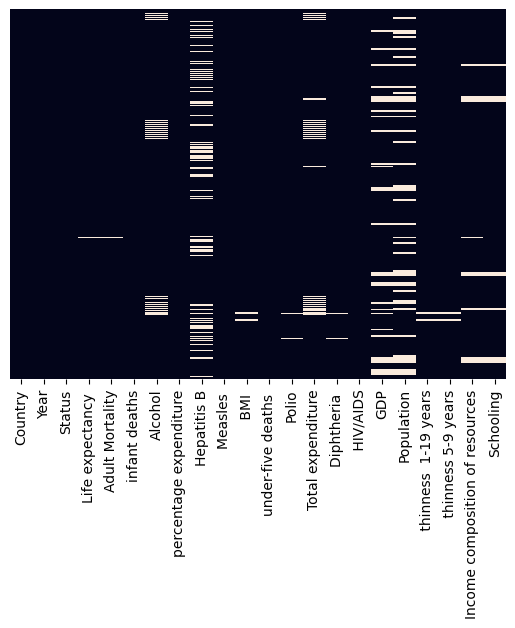

In [56]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False);

In [57]:
#Rellenarremos los valores faltantes con el promedio de sus columnas para no tener que eliminarlas
df.fillna(df.mean(), inplace=True)
df.isnull().sum()

<ipython-input-57-43c4d1bf31d7>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)


Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

In [67]:
#Le cambiaré el nombre de las columnas para que se pueda entender mejor a lo que se refiere cada columna
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [68]:
dic_columns={'Country': 'Country', 'Year': 'Year', 'Status': 'Developed or Developing status', 'Life expectancy ': 'Life Expectancy in age', 'Adult Mortality': 'Adult Mortality Rates of both sexes between 15 and 60 years/1k pop',
       'infant deaths': 'Number of Infant Death/1k pop', 'Alcohol': 'Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)', 'percentage expenditure': 'Expenditure on health as a percene of Gross Domestic Product per capita(%)', 'Hepatitis B': 'Hepatitis B (HepB) immunization coverage among 1-year-olds (%)',
       'Measles ':'Measles - number of reported cases/1k pop', ' BMI ': 'Average Body Mass Index of entire population', 'under-five deaths ':'Number of under-five deaths per 1000 population', 'Polio': 'Polio (Pol3) immunization coverage among 1-year-olds (%)', 'Total expenditure':'General government expenditure on health as a percene of total government expenditure (%)',
       'Diphtheria ':'Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)', ' HIV/AIDS': 'Deaths per 1 000 live births HIV/AIDS (0-4 years)', 'GDP':'Gross Domestic Product per capita (in USD)', 'Population':'Population of the country',
       ' thinness  1-19 years':'Prevalence of thinness among children and adolescents for Age 10 to 19 (%)', ' thinness 5-9 years':'Prevalence of thinness among children for Age 5 to 9(%)',
       'Income composition of resources':'Income composition of resources', 'Schooling':'Number of years of Schooling(years)'}

In [69]:
df2=df.rename(columns=dic_columns)
df2

,Country,Year,Developed or Developing status,Life Expectancy in age,Adult Mortality Rates of both sexes between 15 and 60 years/1k pop,Number of Infant Death/1k pop,"Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)",Expenditure on health as a percene of Gross Domestic Product per capita(%),Hepatitis B (HepB) immunization coverage among 1-year-olds (%),Measles - number of reported cases/1k pop,...,Polio (Pol3) immunization coverage among 1-year-olds (%),General government expenditure on health as a percene of total government expenditure (%),Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%),Deaths per 1 000 live births HIV/AIDS (0-4 years),Gross Domestic Product per capita (in USD),Population of the country,Prevalence of thinness among children and adolescents for Age 10 to 19 (%),Prevalence of thinness among children for Age 5 to 9(%),Income composition of resources,Number of years of Schooling(years)
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


<ipython-input-66-7223efd44ee6>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr());


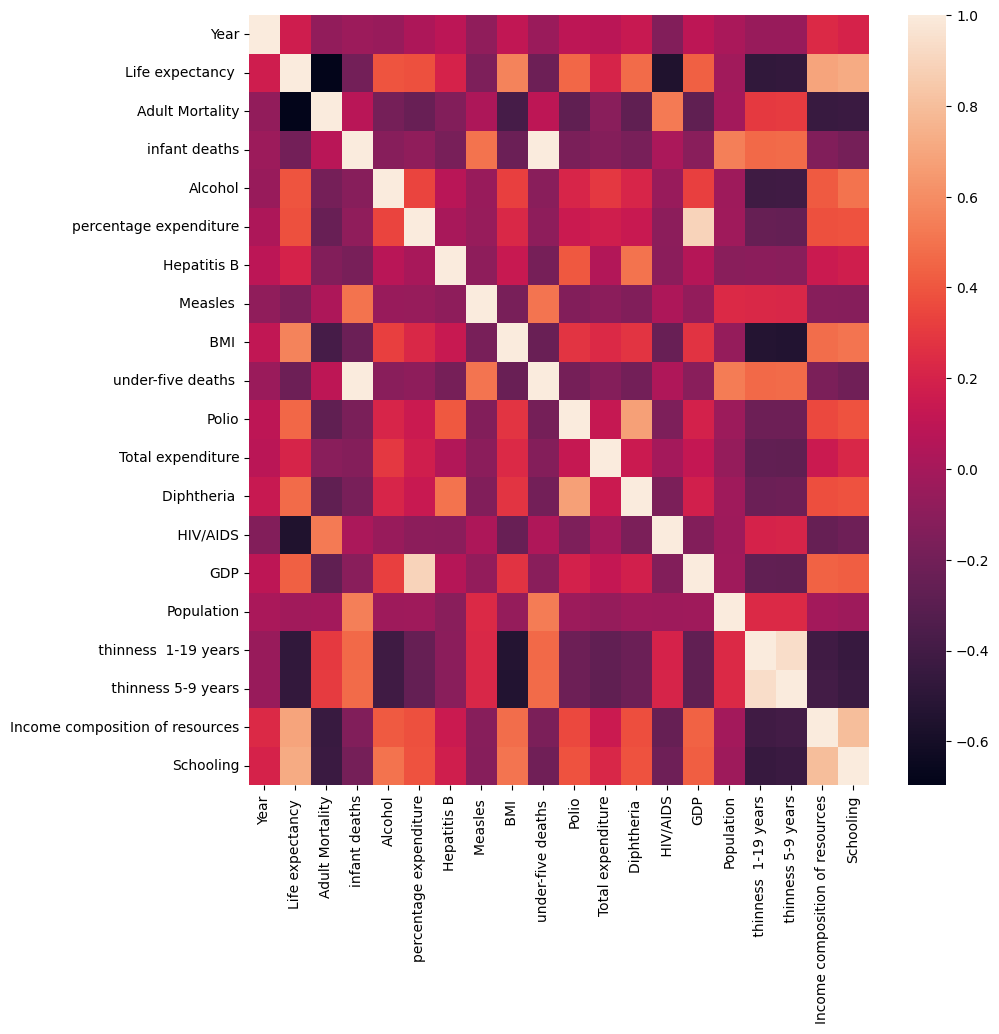

In [66]:
#Queremos darle un vistazo rápido para ver cómo se relacionan las variables entre sí
plt.figure(figsize=(10,10))
sns.heatmap(df.corr());

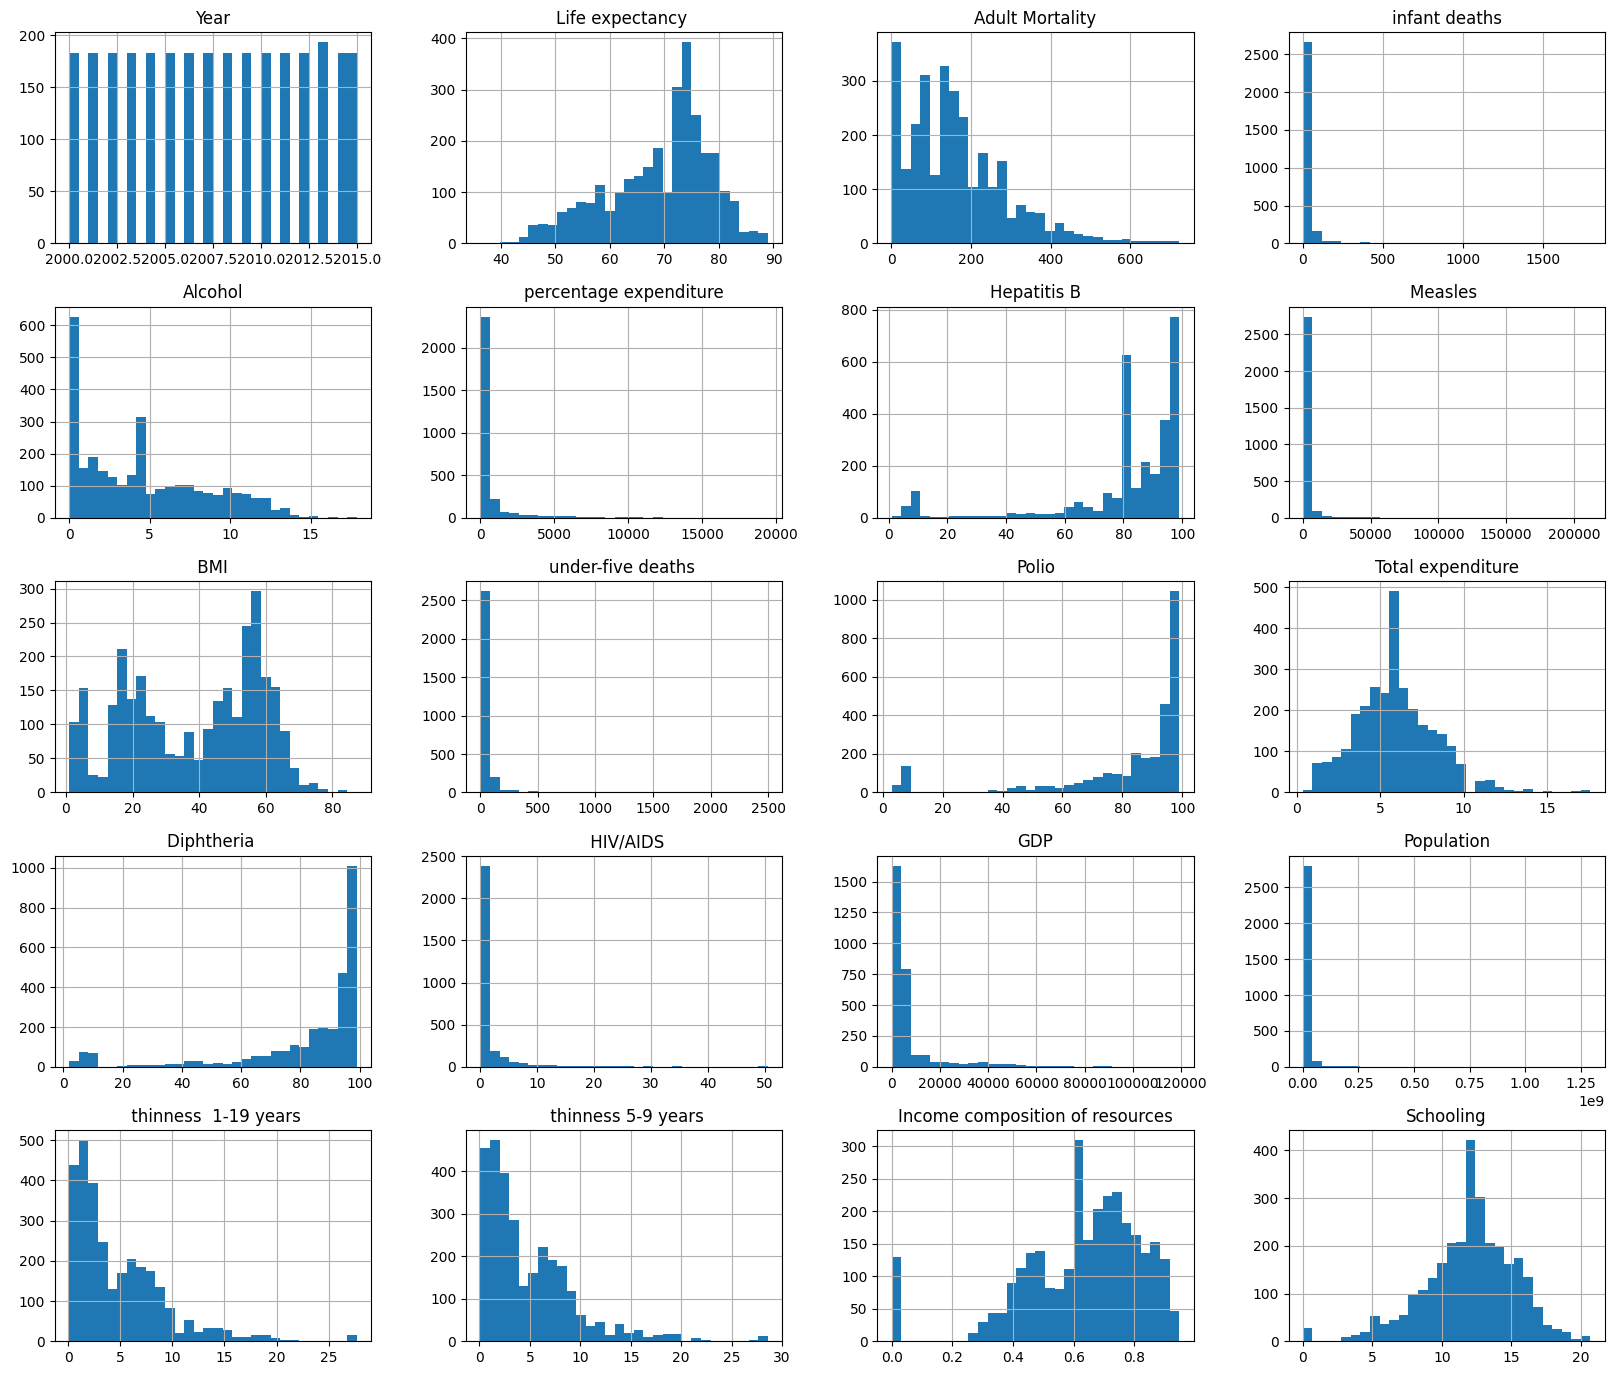

In [59]:
df.hist(bins=30, figsize=(20,17));

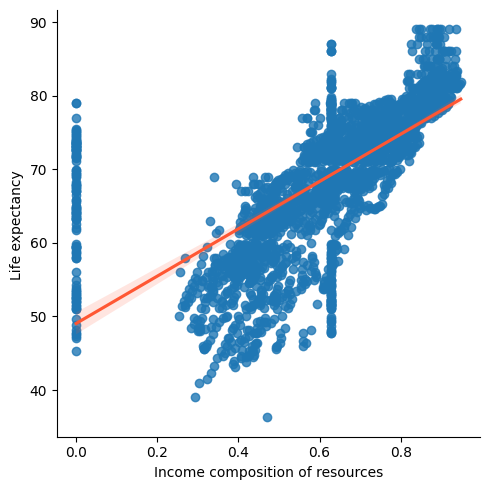

In [60]:
#Haremos una relacion entre la "Expectativa de vida" vs "Income composition of resources"
#La relación se hace puesto que, en el mapa de calor, nos salió que se relacionan de forma positiva
#print(df.columns)
sns.lmplot(x='Income composition of resources', y='Life expectancy ', data=df, line_kws={'color': '#FF5733'})

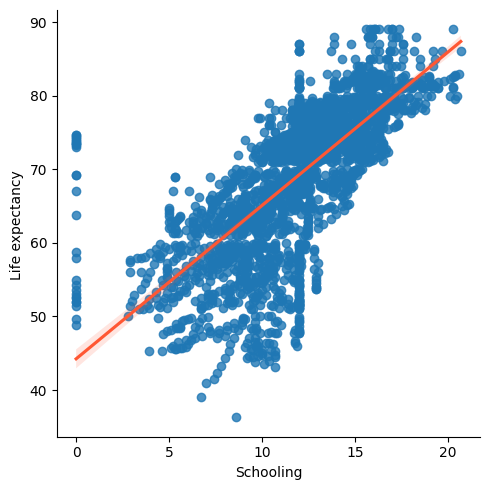

In [61]:
sns.lmplot(x='Schooling', y='Life expectancy ', data=df, line_kws={'color': '#FF5733'})

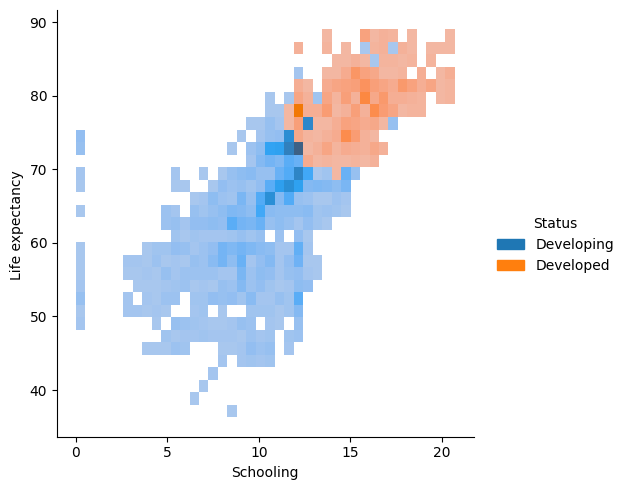

In [71]:
sns.displot(data=df,x='Schooling', y='Life expectancy ', hue='Status')